In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ecommerce_ml.csv")
df.head()

,Region,City,Category,Sub-Category,Quantity,Unit Price,Discount,Sales,Payment Mode,Year,Month,Sales_log
0,South,Bangalore,Books,Non-Fiction,2,36294,5,68958.6,Debit Card,2024,10,11.141276
1,North,Delhi,Groceries,Rice,1,42165,20,33732.0,Debit Card,2025,8,10.426232
2,East,Patna,Kitchen,Juicer,4,64876,20,207603.2,Credit Card,2023,11,12.243389
3,East,Kolkata,Groceries,Oil,5,37320,15,158610.0,UPI,2025,5,11.974210
4,West,Pune,Clothing,Kids Wear,1,50037,10,45033.3,Debit Card,2025,1,10.715180


In [3]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Region        5000 non-null   object 
 1   City          5000 non-null   object 
 2   Category      5000 non-null   object 
 3   Sub-Category  5000 non-null   object 
 4   Quantity      5000 non-null   int64  
 5   Unit Price    5000 non-null   int64  
 6   Discount      5000 non-null   int64  
 7   Sales         5000 non-null   float64
 8   Payment Mode  5000 non-null   object 
 9   Year          5000 non-null   int64  
 10  Month         5000 non-null   int64  
 11  Sales_log     5000 non-null   float64
dtypes: float64(2), int64(5), object(5)
memory usage: 468.9+ KB


Region          0
City            0
Category        0
Sub-Category    0
Quantity        0
Unit Price      0
Discount        0
Sales           0
Payment Mode    0
Year            0
Month           0
Sales_log       0
dtype: int64

In [4]:
df_monthly = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
df_monthly.head()

,Year,Month,Sales
0,2023,10,21307522.20
1,2023,11,22040269.20
2,2023,12,20624240.25
3,2024,1,21477241.40
4,2024,2,19853396.50


In [5]:
df_monthly['Date'] = pd.to_datetime(
    df_monthly['Year'].astype(str) + '-' + df_monthly['Month'].astype(str)
)

df_monthly = df_monthly.sort_values('Date')


In [6]:
df_monthly = df_monthly[['Date', 'Sales']]
df_monthly.set_index('Date', inplace=True)

df_monthly.head()


,Sales
Date,
2023-10-01,21307522.20
2023-11-01,22040269.20
2023-12-01,20624240.25
2024-01-01,21477241.40
2024-02-01,19853396.50


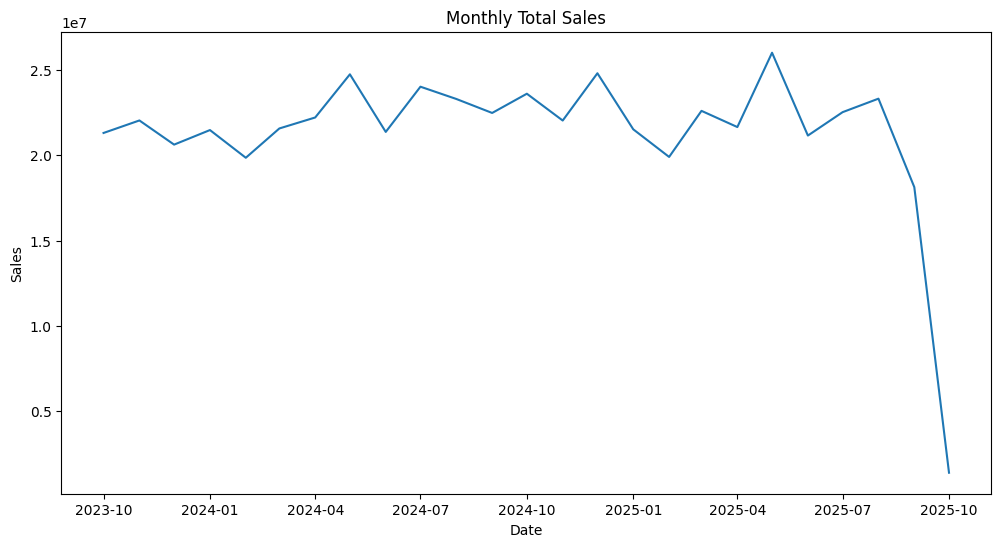

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df_monthly['Sales'])
plt.title("Monthly Total Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


In [8]:
df_monthly.tail(12)


,Sales
Date,
2024-11-01,22036247.55
2024-12-01,24806786.40
2025-01-01,21520801.80
2025-02-01,19902446.10
2025-03-01,22602988.75
2025-04-01,21653817.90
2025-05-01,26010928.65
2025-06-01,21155496.20
2025-07-01,22526567.55


In [9]:
df_monthly.describe()


,Sales
count,2.500000e+01
mean,2.134664e+07
std,4.494521e+06
min,1.391328e+06
25%,2.130752e+07
50%,2.203625e+07
75%,2.329989e+07
max,2.601093e+07


In [10]:
df_monthly.index.year.unique()


Index([2023, 2024, 2025], dtype='int32', name='Date')

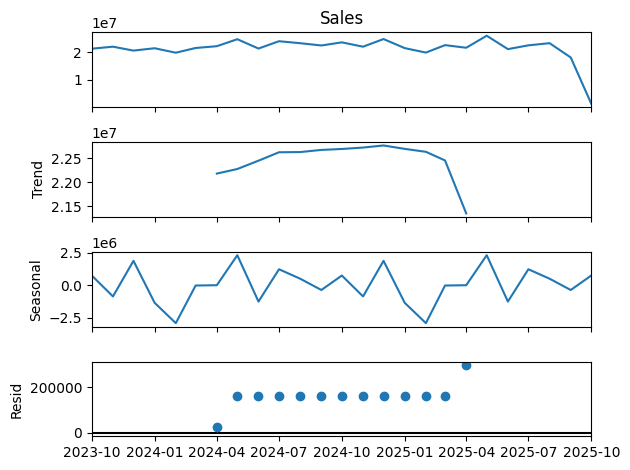

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_monthly['Sales'], model='additive', period=12)
decomposition.plot()
plt.show()


In [12]:
df_monthly.tail(6)


,Sales
Date,
2025-05-01,26010928.65
2025-06-01,21155496.20
2025-07-01,22526567.55
2025-08-01,23317916.20
2025-09-01,18131496.70
2025-10-01,1391328.40


Heqim muajin e fundit sepse nuk eshte i plot

In [13]:
df_monthly = df_monthly.iloc[:-1]
df_monthly.tail(5)


,Sales
Date,
2025-05-01,26010928.65
2025-06-01,21155496.20
2025-07-01,22526567.55
2025-08-01,23317916.20
2025-09-01,18131496.70


Train / Test Split

In [14]:
train = df_monthly.iloc[:-12]
test = df_monthly.iloc[-12:]

In [15]:
print("Train size:", len(train))
print("Test size:", len(test))


Train size: 12
Test size: 12


1️⃣ Baseline Model (Historical Mean)

In [16]:
baseline_pred = [train['Sales'].mean()] * len(test)
print(baseline_pred)

[np.float64(22083464.625000004), np.float64(22083464.625000004), np.float64(22083464.625000004), np.float64(22083464.625000004), np.float64(22083464.625000004), np.float64(22083464.625000004), np.float64(22083464.625000004), np.float64(22083464.625000004), np.float64(22083464.625000004), np.float64(22083464.625000004), np.float64(22083464.625000004), np.float64(22083464.625000004)]


RMSE (Root Mean Squared Error)

In [17]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test['Sales'], baseline_pred))
print("Baseline RMSE:", rmse)


Baseline RMSE: 2018540.606177759


MAE (Mean Absolute Error)

In [24]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test['Sales'], baseline_pred)
print("Baseline MAE:", mae)


Baseline MAE: 1539375.6624999996


# Linear Regression Model (First try)

In [30]:
train.columns

Index(['Sales', 'Month', 'Year'], dtype='object')

In [ ]:
train['Month'] = train.index.month
train['Year'] = train.index.year

test['Month'] = test.index.month
test['Year'] = test.index.year

In [31]:
X_train = train[['Year', 'Month']]
y_train = train['Sales']

X_test = test[['Year', 'Month']]
y_test = test['Sales']


In [32]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [33]:
lr_pred = lr_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))

print("Linear Regression MAE:", lr_mae)
print("Linear Regression RMSE:", lr_rmse)


Linear Regression MAE: 2774133.560483646
Linear Regression RMSE: 3440797.76050168


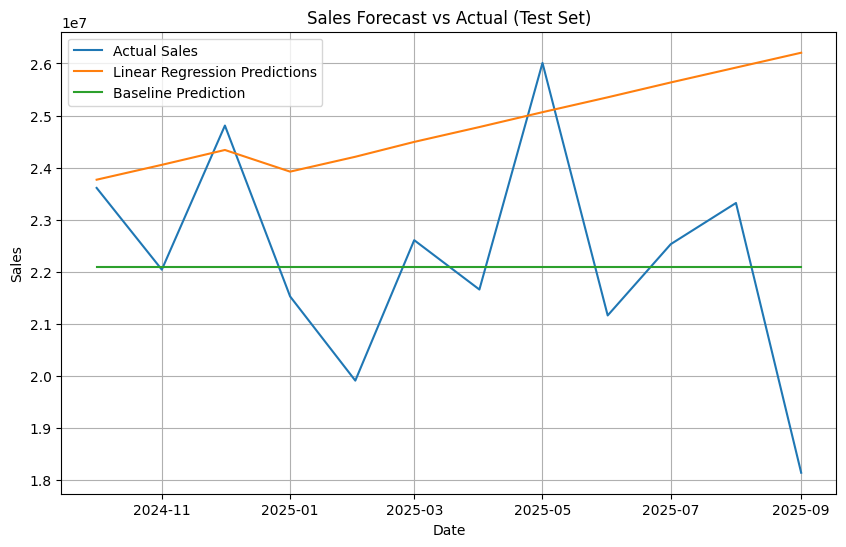

In [ ]:


plt.figure(figsize=(10,6))

plt.plot(test.index, y_test, label='Actual Sales')

plt.plot(test.index, lr_pred, label='Linear Regression Predictions')

plt.plot(test.index, baseline_pred, label='Baseline Prediction')

plt.title("Sales Forecast vs Actual (Test Set)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)

plt.show()


# Linear Regression Model (Improved)

In [ ]:
train['Month_sin'] = np.sin(2 * np.pi * train['Month'] / 12)
train['Month_cos'] = np.cos(2 * np.pi * train['Month'] / 12)

test['Month_sin'] = np.sin(2 * np.pi * test['Month'] / 12)
test['Month_cos'] = np.cos(2 * np.pi * test['Month'] / 12)

In [ ]:
train['Lag1'] = train['Sales'].shift(1)
train['Lag2'] = train['Sales'].shift(2)

train = train.dropna()

In [38]:
last_train_sales = train['Sales'].iloc[-2:].values

In [39]:
test = test.copy()

test['Lag1'] = np.nan
test['Lag2'] = np.nan

test.iloc[0, test.columns.get_loc('Lag1')] = last_train_sales[-1]
test.iloc[0, test.columns.get_loc('Lag2')] = last_train_sales[-2]


In [40]:
X_train = train[['Year', 'Month_sin', 'Month_cos', 'Lag1', 'Lag2']]
y_train = train['Sales']

from sklearn.linear_model import LinearRegression

model_improved = LinearRegression()
model_improved.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [41]:
predictions = []

for i in range(len(test)):
    if i > 0:
        test.iloc[i, test.columns.get_loc('Lag1')] = predictions[i-1]
        test.iloc[i, test.columns.get_loc('Lag2')] = test.iloc[i-1]['Lag1']

    X_test_row = test[['Year', 'Month_sin', 'Month_cos', 'Lag1', 'Lag2']].iloc[i:i+1]
    
    pred = model_improved.predict(X_test_row)[0]
    predictions.append(pred)


In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

improved_mae = mean_absolute_error(test['Sales'], predictions)
improved_rmse = np.sqrt(mean_squared_error(test['Sales'], predictions))

print("Improved Linear Regression MAE:", improved_mae)
print("Improved Linear Regression RMSE:", improved_rmse)


Improved Linear Regression MAE: 1731086.5768367883
Improved Linear Regression RMSE: 2185439.315242772


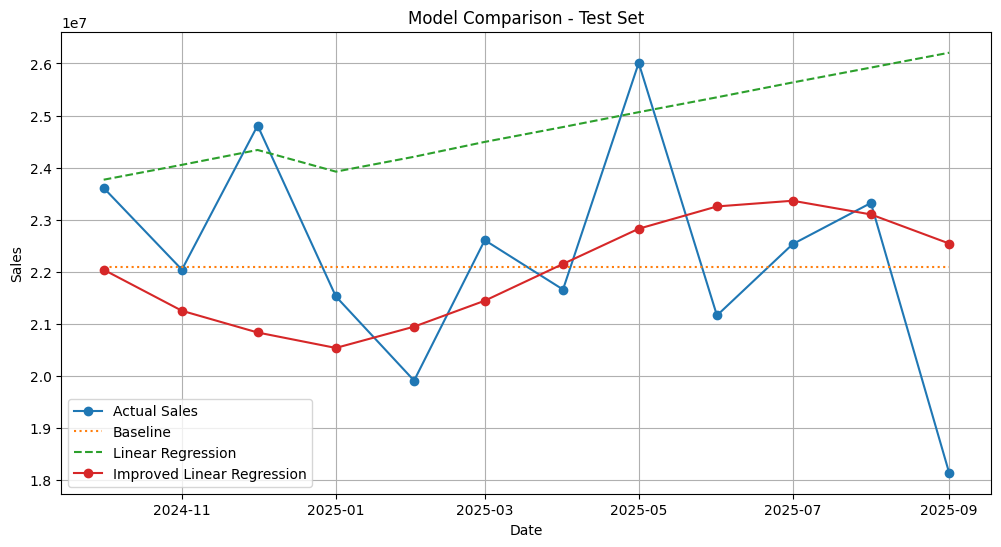

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))


plt.plot(test.index, test['Sales'], marker='o', label='Actual Sales')


plt.plot(test.index, baseline_pred, linestyle=':', label='Baseline')


plt.plot(test.index, lr_pred, linestyle='--', label='Linear Regression')


plt.plot(test.index, predictions, marker='o', linestyle='-', label='Improved Linear Regression')

plt.title("Model Comparison - Test Set")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)

plt.show()


Random Forest Model